In [1]:
import torch
import matplotlib.pyplot as plt

torch.manual_seed(0)

In [2]:
def relu(x):
    return torch.maximum(torch.zeros_like(x), x)

def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

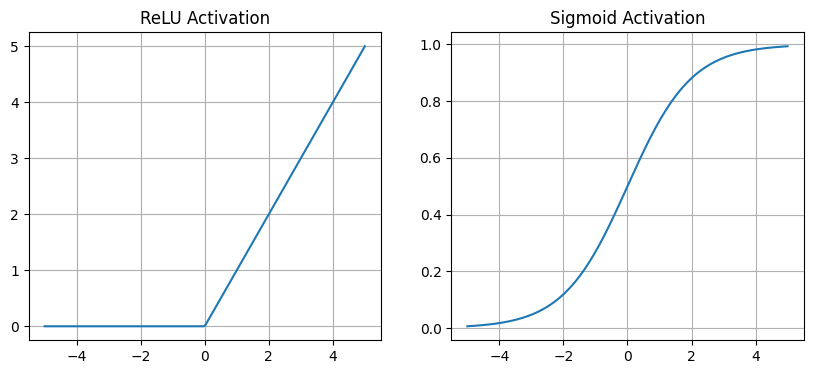

In [3]:
x = torch.linspace(-5, 5, 200)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(x.numpy(), relu(x).numpy())
plt.title("ReLU Activation")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(x.numpy(), sigmoid(x).numpy())
plt.title("Sigmoid Activation")
plt.grid(True)

plt.show()

In [4]:
# One neuron model: y = sigmoid(w*x + b)
x = torch.linspace(-1, 1, 10).unsqueeze(1)
y_true = 2*x + 1

w = torch.randn(1,1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

lr = 0.1
for epoch in range(50):
    # Forward pass
    y_pred = sigmoid(x.mm(w) + b)
    
    # Loss
    loss = ((y_pred - y_true) ** 2).mean()
    
    # Backward pass
    loss.backward()
    
    # Update weights
    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad
        w.grad.zero_()
        b.grad.zero_()
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 1.4435
Epoch 10, Loss: 1.3357
Epoch 20, Loss: 1.2672
Epoch 30, Loss: 1.2213
Epoch 40, Loss: 1.1888


In [5]:
print("Learned weight:", w.item())
print("Learned bias:", b.item())

Learned weight: 2.3985939025878906
Learned bias: 0.45776090025901794


In [6]:
### Gradient Descent & Backpropagation

- **Gradient descent:** Iteratively updates parameters θ using:
  θ ← θ - η ∇L(θ)
  where η = learning rate.

- **Backpropagation (autograd):** 
  PyTorch builds a computation graph and uses the chain rule to compute gradients of loss wrt each parameter.

- **Activations:**
  - ReLU(x) = max(0,x) → efficient, avoids vanishing gradients for positive x.
  - Sigmoid(x) = 1/(1+e^-x) → maps to [0,1], but suffers vanishing gradients for large |x|.

- **Takeaway:** Autograd + activations let us train nonlinear models efficiently. Today's toy neuron demonstrates how PyTorch automates the math of backprop.

SyntaxError: invalid character '←' (U+2190) (3252085049.py, line 4)